<a href="https://colab.research.google.com/github/Mjcherono/TrialProjects/blob/main/Copy_of_Python_Programming_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Regression Models

## Challenge 1

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix

In [18]:
# Question
# ---
# Predict whether a customer buy life insurance or not.
# ---
# Dataset url = http://bit.ly/MSInsuranceDataset
# Attributes - 
# 1. age: age of a person 
# 2. insurance: bought insurance. 
# O indicates "No", 1 indicates "Yes"
# ---
# 
insurance = pd.read_csv('http://bit.ly/MSInsuranceDataset')
insurance

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


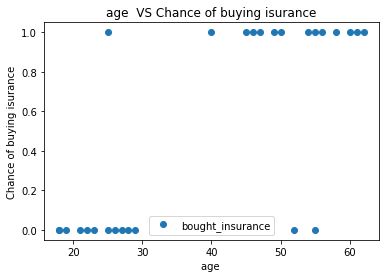

In [9]:
import matplotlib.pyplot as plt

insurance.plot(x='age', y='bought_insurance', style='o')
plt.title('age  VS Chance of buying isurance')
plt.xlabel('age ')
plt.ylabel('Chance of buying isurance')
plt.show()

In [8]:
#I sued cross validation to split

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

X = insurance[['age']].values
y = insurance['bought_insurance'].values

folds = KFold(n_splits=5)

RMSES = [] 
count = 1  
for train, test in folds.split(X):
  
  X_train, X_test = X[train], X[test]
  y_train, y_test = y[train], y[test]
  
  LogReg = LogisticRegression()
  LogReg.fit(X_train, y_train)

  y_pred = LogReg.predict(X_test)

  from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
  
  #rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  #RMSES.append(rmse_value)
  
  #print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  #count = count + 1

array([[1, 0],
       [1, 3]])

#####Model 4 has the lowest rmse therefore the best in this case

In [159]:
  y_pred = LogReg.predict(X_test)
  y_pred

array([0, 1, 1, 1, 0])

## Challenge 2

In [21]:
# Question
# ---
# Build a model to predict the presence of a heart disease in a patient.
# ---
# Dataset url = http://bit.ly/HeartDiseaseDataset
# ---
# Dataset info = http://bit.ly/HeartDiseaseDatasetInfo
# 
heart_disease = pd.read_csv('http://bit.ly/HeartDiseaseDataset')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [23]:
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

In [24]:
heart_disease.target.nunique()

2

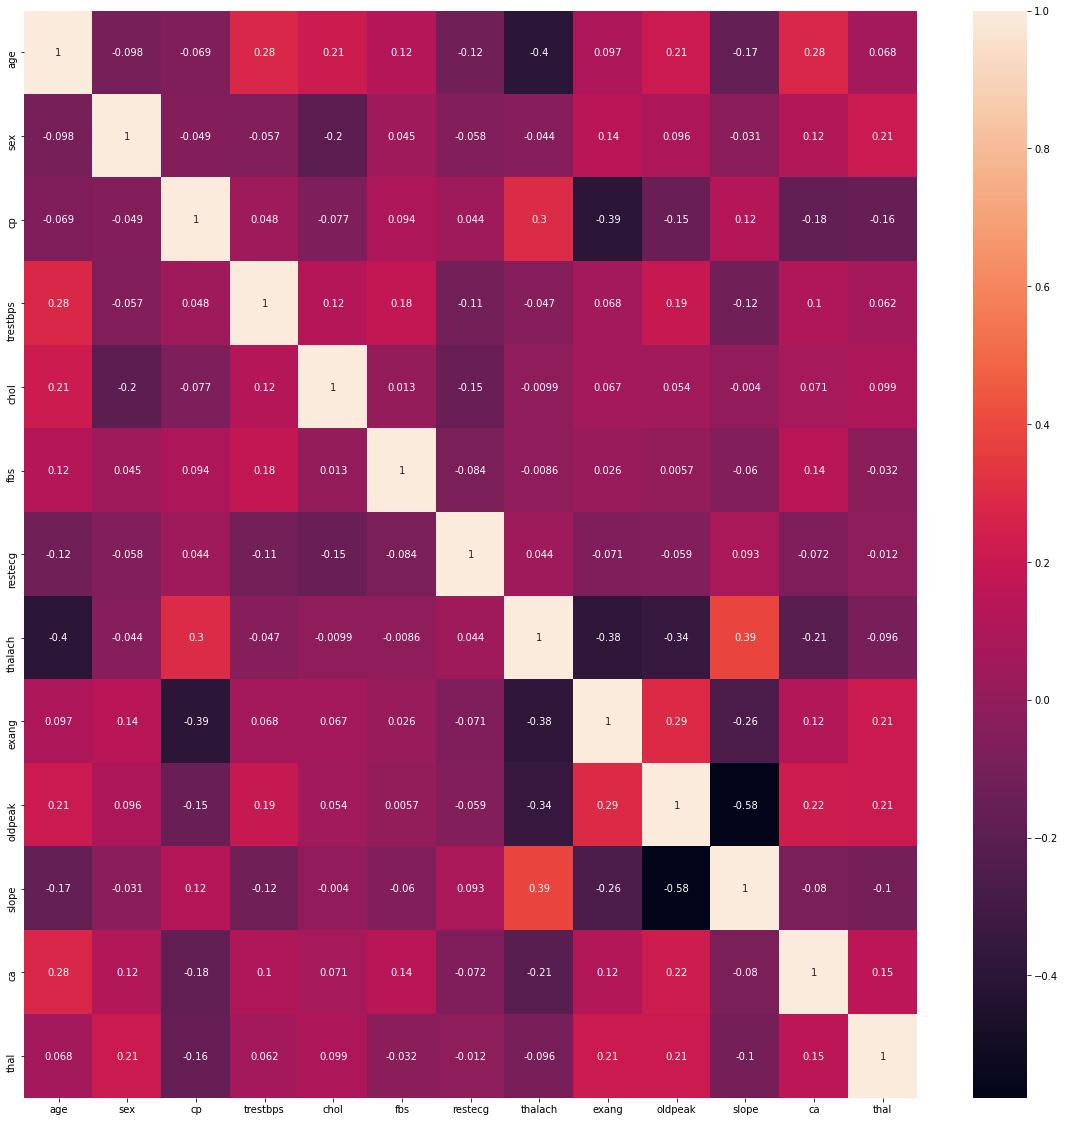

In [25]:
#check the distribution of data
import seaborn as sns

plt.subplots(figsize=(20,20))
sns.heatmap(x.corr(),annot=True)

In [26]:
correlations = x.corr()
correlations

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


In [27]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.443474,0.133652,-0.068543,-0.292073,-0.219082,-0.080342,0.070286,0.563679,0.108477,-0.049880,-0.032733,-0.246316,-0.022842
sex,0.133652,1.161866,-0.035520,0.066952,0.251554,-0.061890,0.104735,0.013589,-0.128878,-0.083356,-0.062467,-0.122759,-0.231043
cp,-0.068543,-0.035520,1.284456,-0.087022,0.065011,-0.131099,-0.029143,-0.227585,0.407728,-0.016703,0.024635,0.172558,0.087953
trestbps,-0.292073,0.066952,-0.087022,1.170591,-0.044105,-0.158602,0.075740,-0.138050,-0.068925,-0.188979,0.010783,-0.003856,-0.038527
chol,-0.219082,0.251554,0.065011,-0.044105,1.150174,0.011050,0.156441,-0.128791,-0.076353,-0.037443,-0.058132,-0.019839,-0.127933
fbs,-0.080342,-0.061890,-0.131099,-0.158602,0.011050,1.087379,0.052068,-0.050063,-0.069505,0.113470,0.102337,-0.154199,0.061294
restecg,0.070286,0.104735,-0.029143,0.075740,0.156441,0.052068,1.060998,0.037752,0.031683,-0.039742,-0.099359,0.025732,-0.046151
thalach,0.563679,0.013589,-0.227585,-0.138050,-0.128791,-0.050063,0.037752,1.613726,0.360550,0.114685,-0.364306,0.089667,-0.052643
exang,0.108477,-0.128878,0.407728,-0.068925,-0.076353,-0.069505,0.031683,0.360550,1.402001,-0.152466,0.074761,0.057349,-0.128295
oldpeak,-0.049880,-0.083356,-0.016703,-0.188979,-0.037443,0.113470,-0.039742,0.114685,-0.152466,1.705857,0.845691,-0.222262,-0.156907


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = logistic.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0])

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[33, 11],
       [ 4, 43]])

## Challenge 3

In [39]:
# Question
# ---
# Create a model to accurately predict insurance costs.
# ---
# Dataset url = http://bit.ly/InsuranceDataset2
# ---
# 
insurance_cost = pd.read_csv('http://bit.ly/InsuranceDataset2')
insurance_cost

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [40]:
insurance_cost['sex'] = pd.get_dummies(insurance_cost['sex'],drop_first=True)
insurance_cost['smoker'] = pd.get_dummies(insurance_cost['smoker'],drop_first=True)
insurance_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [41]:
#label encode the region column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
insurance_cost['region'] = le.fit_transform(insurance_cost['region'])
insurance_cost

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [50]:
x = insurance_cost.drop(['charges'], axis=1).values
y = insurance_cost['charges'].values

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 5)

In [60]:
polyreg = PolynomialFeatures(degree=1)
x_poly = polyreg.fit_transform(x)

In [61]:
linreg = LinearRegression()
linreg.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_pred = linreg.predict(x_poly)
y_pred

array([25111.24186363,  3687.60517284,  6963.14570669, ...,
        4363.66236622,  1106.98661296, 37013.72809551])

In [ ]:
#linreg.predict([[]])

## Challenge 4

In [136]:
# Question
# ---
# Predict whether income exceeds $50K/yr based on the given dataset.
# ---
# Dataset url = http://bit.ly/AdultDataset
# ---
# 
income = pd.read_csv('http://bit.ly/AdultDataset')
income.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [137]:
income['income'].nunique()

2

In [138]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
income['workclass'] = le.fit_transform(income['workclass'])
income['education'] = le.fit_transform(income['education'])
income['marital-status'] = le.fit_transform(income['marital-status'])
income['occupation'] = le.fit_transform(income['occupation'])
income['relationship'] = le.fit_transform(income['relationship'])
income['race'] = le.fit_transform(income['race'])
income['gender'] = le.fit_transform(income['gender'])
income['race'] = le.fit_transform(income['race'])
income['income'] = le.fit_transform(income['income'])

In [139]:
income.dtypes

age                 int64
workclass           int64
fnlwgt              int64
education           int64
educational-num     int64
marital-status      int64
occupation          int64
relationship        int64
race                int64
gender              int64
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object

In [140]:
income.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,United-States,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,United-States,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,United-States,1


In [141]:
income.drop(['native-country'],axis= 1, inplace=True)


In [142]:
income.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,1


In [147]:
X = income.drop(['income'], axis=1)
y = income['income']

In [153]:
#split
X_train,X_test,y_train,y_test = train_test_split(X , y, test_size = 0.2, random_state = 0)

In [154]:
#feature scaling
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

In [155]:
#fitting model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
y_pred = logreg.predict(X_test)

In [157]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[7177,  243],
       [1722,  627]])

## Challenge 5

In [263]:
# Question
# ---
# Given the following dataset create a model to predict the maximum temperature.
# ---
# Dataset url = http://bit.ly/WeatherDataset
# ---
# 
temp = pd.read_csv('http://bit.ly/WeatherDataset')
temp.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes


In [264]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
temp['RainToday'] = le.fit_transform(temp['RainToday'])
temp['RainTomorrow'] = le.fit_transform(temp['RainTomorrow'])

In [265]:
temp.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1


In [266]:
temp.drop(['WindGustDir','WindDir9am','WindDir3pm','MinTemp'], axis = 1, inplace=True)

In [267]:
temp.head(3)

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1


In [268]:
temp.dropna(inplace=True)
temp.isnull().sum()

MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [269]:
x = temp.drop(['MaxTemp'], axis=1).values
y = temp['MaxTemp'].values

In [270]:
#split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [272]:
#fit
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [273]:
y_pred = linreg.predict(x_test)
y_pred

array([18.76036452, 25.3769558 , 16.46802047, 12.96530821, 35.0952036 ,
       11.44292921, 24.41258052, 33.50319446, 27.34639647, 14.88284048,
       22.65228019, 13.56607145, 13.90277288, 17.6875566 , 26.46118107,
       17.49396661, 30.24048371, 11.69703457, 28.59842741, 19.58487637,
       12.43770096, 19.59022597, 22.18500927, 15.431495  , 12.93084683,
       13.18174639, 26.76013427, 20.73237357, 32.06603248, 20.49596754,
       12.96403299, 28.31631001, 20.77290691, 25.35878716, 22.13181096,
       19.81017026, 21.00119113, 24.02352   , 22.44764252, 25.86935183,
       34.27033365, 16.04861972, 14.6735673 , 18.41554268, 13.57895037,
       12.29908832, 25.72957369, 29.82833883, 24.06003104, 19.03198974,
       12.61909085, 12.40200538, 20.21251957, 14.50929064, 17.14521476,
       26.10231626, 17.1656495 , 29.60095665, 17.95944775, 15.83245786,
       35.36974521, 22.99879874, 29.61260297, 21.47228053, 28.48846246,
       26.48874394, 19.07681651, 18.57495391, 12.02792762, 16.51

In [276]:
temp.describe()

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,20.601412,1.420904,4.558192,7.925424,40.011299,9.666667,18.014124,71.875706,44.454802,1019.562147,1016.692090,3.920904,4.019774,12.438701,19.271469,0.180791,1.448588,0.180791
std,6.708966,4.235358,2.667877,3.510039,13.034488,7.978489,8.880531,13.161939,16.944316,6.602685,6.373679,2.962363,2.672312,5.630160,6.663681,0.385390,4.282531,0.385390
min,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000,0.000000,0.000000
25%,15.100000,0.000000,2.400000,5.925000,31.000000,6.000000,11.000000,64.000000,32.000000,1015.225000,1012.725000,1.000000,1.000000,7.725000,14.300000,0.000000,0.000000,0.000000
50%,19.750000,0.000000,4.200000,8.650000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.000000,1017.200000,4.000000,4.000000,12.600000,18.600000,0.000000,0.000000,0.000000
75%,25.500000,0.200000,6.400000,10.600000,46.000000,13.000000,24.000000,80.000000,54.750000,1024.400000,1021.350000,7.000000,7.000000,17.000000,24.000000,0.000000,0.200000,0.000000
max,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,1.000000,39.800000,1.000000


In [275]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6408054984903887
Mean Squared Error: 1.3028032463547996
Root Mean Squared Error: 1.1414040679596336
